In [1]:
# 01_data.ipynb
# Purpose: Download raw equity data for a sandbox set of tickers and perform basic exploratory data analysis (EDA).

In [2]:
import os
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Paths
DATA_RAW = os.path.join("..", "data", "raw")
os.makedirs(DATA_RAW, exist_ok=True)

# Sandbox tickers
tickers = ["AAPL", "MSFT", "JPM", "XOM", "PG"]
# In this sandbox, we work with only five tickers first as it suffices for the purpose of checking pipeline
# AAPL (Tech)
# MSFT (Tech)
# JPM (Finance)
# XOM (Energy)
# PG (Consumer Staples)


In [3]:
all_data = {}
for t in tickers:
    df = yf.download(t, start="2015-01-01", end="2025-01-01", auto_adjust=True)
    print(t, df.shape)
    df.to_csv(os.path.join(DATA_RAW, f"{t}.csv"))
    all_data[t] = df
# here we download one by one because the bulk-download was somehow blocked by yf due to rate-limit

[*********************100%***********************]  1 of 1 completed


AAPL (2516, 5)


[*********************100%***********************]  1 of 1 completed


MSFT (2516, 5)


[*********************100%***********************]  1 of 1 completed


JPM (2516, 5)


[*********************100%***********************]  1 of 1 completed


XOM (2516, 5)


[*********************100%***********************]  1 of 1 completed

PG (2516, 5)


In [4]:
aapl = pd.read_csv(os.path.join(DATA_RAW, "AAPL.csv"), index_col=0, parse_dates=True)

print("AAPL shape:", aapl.shape)
print(aapl.head())
print(aapl.tail())

AAPL shape: (2518, 5)
                         Close                High                 Low  \
Price                                                                    
Ticker                    AAPL                AAPL                AAPL   
Date                       NaN                 NaN                 NaN   
2015-01-02  24.261049270629883  24.729272337596463   23.82167345251905   
2015-01-05  23.577571868896484  24.110147948537623  23.391171172179064   
2015-01-06  23.579792022705078   23.83942229690088  23.218083238966898   

                         Open     Volume  
Price                                     
Ticker                   AAPL       AAPL  
Date                      NaN        NaN  
2015-01-02  24.71817633026032  212818400  
2015-01-05  24.03026145194082  257142000  
2015-01-06  23.64192558989593  263188400  
                        Close                High                 Low  \
Price                                                                   
2024-12-24  

C:\Users\dodo8\AppData\Local\Temp\ipykernel_27996\899898999.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aapl = pd.read_csv(os.path.join(DATA_RAW, "AAPL.csv"), index_col=0, parse_dates=True)


In [9]:
# we notice column levels (multi-index)
# and the raw data carries "Price" and "Ticker". Define the following function to do a first clean-up step:
# remove row->reindex->rename column
def load_prices(ticker, data_path="..\\data\\raw"):
    """Load CSV and fix columns to ['Close','High','Low','Open','Volume']"""
    df = pd.read_csv(
        os.path.join(data_path, f"{ticker}.csv"),
        header=1,  # skip first multi-index row
        index_col=0,
        parse_dates=True
    )
    df.index.name = "Date"

    # Rename columns to standard OHLCV
    df.columns = ["Close", "High", "Low", "Open", "Volume"]

    # Ensure sorted by date
    df = df.sort_index()
    return df

In [10]:
# Test with AAPL
aapl = load_prices("AAPL")
print(aapl.head())
print(aapl.tail())

                Close       High        Low       Open       Volume
Date                                                               
2015-01-02  24.261049  24.729272  23.821673  24.718176  212818400.0
2015-01-05  23.577572  24.110148  23.391171  24.030261  257142000.0
2015-01-06  23.579792  23.839422  23.218083  23.641926  263188400.0
2015-01-07  23.910429  24.010286  23.677426  23.788380  160423600.0
2015-01-08  24.829126  24.886823  24.121244  24.238856  237458000.0
                 Close        High         Low        Open      Volume
Date                                                                  
2024-12-26  258.103729  259.179926  256.718662  257.276679  27237100.0
2024-12-27  254.685867  257.784882  252.164818  256.917934  42355300.0
2024-12-30  251.307861  252.603266  249.862994  251.337754  35557500.0
2024-12-31  249.534180  252.384064  248.547676  251.547039  39480700.0
Date               NaN         NaN         NaN         NaN         NaN


C:\Users\dodo8\AppData\Local\Temp\ipykernel_27996\3000014855.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


In [11]:
# so far so good (with appl), let's continue
# the next thing we do is to load all tickers and plot the close prices
# to that end, we define another funcion
def load_close_prices(tickers, data_path="..\\data\\raw"):
    """
    Load multiple tickers and return a wide DataFrame of Close prices.
    Index = Date, Columns = Tickers
    """
    dfs = []
    for t in tickers:
        df = load_prices(t, data_path)
        dfs.append(df["Close"].rename(t)) # The renamed 'Close' price series is then added to the dfs list
    prices = pd.concat(dfs, axis=1) # join the Series horizontally
    return prices

# Test with sandbox tickers
sandbox_tickers = ["AAPL", "MSFT", "JPM", "XOM", "PG"]
prices = load_close_prices(sandbox_tickers)
print(prices.shape)
print(prices.head())
print(prices.tail())


(2517, 5)
                 AAPL       MSFT        JPM        XOM         PG
Date                                                             
2015-01-02  24.261049  39.933064  46.948078  58.423473  66.983498
2015-01-05  23.577572  39.565842  45.490582  56.824890  66.665031
2015-01-06  23.579792  38.985123  44.311050  56.522816  66.361343
2015-01-07  23.910429  39.480442  44.378674  57.095520  66.709442
2015-01-08  24.829126  40.641876  45.370380  58.045856  67.472321
                  AAPL        MSFT         JPM         XOM          PG
Date                                                                  
2024-12-26  258.103729  435.715790  239.257263  103.618492  166.939346
2024-12-27  254.685867  428.177216  237.318726  103.608765  166.321274
2024-12-30  251.307861  422.508362  235.498260  102.908173  163.927460
2024-12-31  249.534180  419.196533  235.882034  104.669365  164.476852
Date               NaN         NaN         NaN         NaN         NaN


C:\Users\dodo8\AppData\Local\Temp\ipykernel_27996\3000014855.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Users\dodo8\AppData\Local\Temp\ipykernel_27996\3000014855.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Users\dodo8\AppData\Local\Temp\ipykernel_27996\3000014855.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Users\dodo8\AppData\Local\Temp\ipykernel_27996\3000014855.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure 

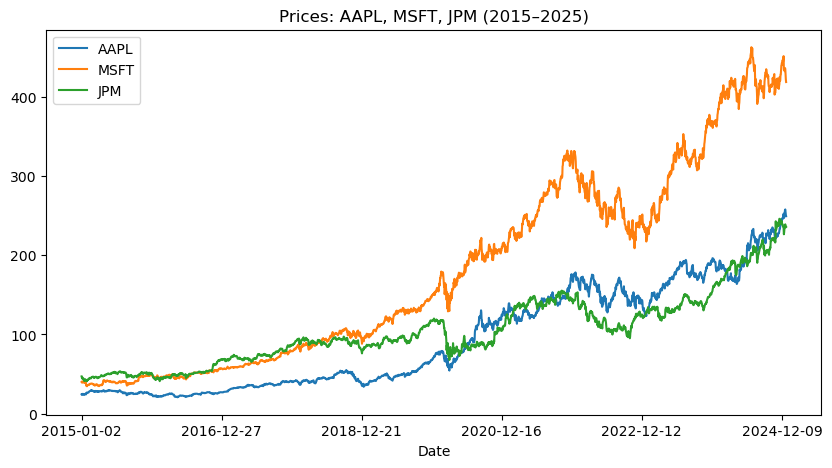

In [12]:
prices[["AAPL", "MSFT", "JPM"]].plot(figsize=(10,5), title="Prices: AAPL, MSFT, JPM (2015–2025)")
plt.show()
# quickly examine three tickers :)

In [13]:
# "fictional question": are the daily returns of different tickers correlated? (In reality, they 'should' if they are from the same sector)
returns = prices.pct_change().dropna()
print("Daily returns correlation matrix:")
print(returns.corr().round(2))


Daily returns correlation matrix:
      AAPL  MSFT   JPM   XOM    PG
AAPL  1.00  0.68  0.42  0.30  0.37
MSFT  0.68  1.00  0.44  0.28  0.42
JPM   0.42  0.44  1.00  0.56  0.34
XOM   0.30  0.28  0.56  1.00  0.26
PG    0.37  0.42  0.34  0.26  1.00


C:\Users\dodo8\AppData\Local\Temp\ipykernel_27996\3542229649.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [15]:
# next, as a precaution, we check the data quality
print("Missing values per ticker:")
print(prices.isna().sum())


Missing values per ticker:
AAPL    1
MSFT    1
JPM     1
XOM     1
PG      1
dtype: int64


In [19]:
print("Number of unique dates:", prices.index.nunique())
print("First date:", prices.index.min(), "Last date:", prices.index.max())
# ignore the minor issue of Last date: Date for now and continue


Number of unique dates: 2517
First date: 2015-01-02 Last date: Date


In [17]:
returns = prices.pct_change()
print("Missing return counts:")
print(returns.isna().sum())


Missing return counts:
AAPL    1
MSFT    1
JPM     1
XOM     1
PG      1
dtype: int64


C:\Users\dodo8\AppData\Local\Temp\ipykernel_27996\680314322.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change()


In [18]:
import numpy as np

abs_returns = returns.abs()
outliers = (abs_returns > 0.2).sum()   # >20% daily move
print("Extreme daily moves (>20%):")
print(outliers)


Extreme daily moves (>20%):
AAPL    0
MSFT    0
JPM     0
XOM     0
PG      0
dtype: int64


In [ ]:
# expected for large-cap S&P100 stocks.